# Apresentação:

O objetivo desse código é realizar um *benchmark* do algoritmo que eu construi e para essa comparação vou utilizar um conjunto de dados de uma competição do Kaggle e um de um dos competidores.

## Dados:
* Benchmark: https://www.kaggle.com/code/baherhamada/country-data-pca-k-means

* Dados: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Benchmark:

In [2]:
# Importando dados:
df = pd.read_csv('/content/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
len(df['country'].unique()) == df.shape[0]

True

In [4]:
df = df.set_index('country');df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [5]:
# Matriz dos dados:
X = df.values

# Escalonando Dados:
scaler = StandardScaler() # z = (x - u) / s
X = scaler.fit_transform(X);X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [6]:
# Escolhendo k:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

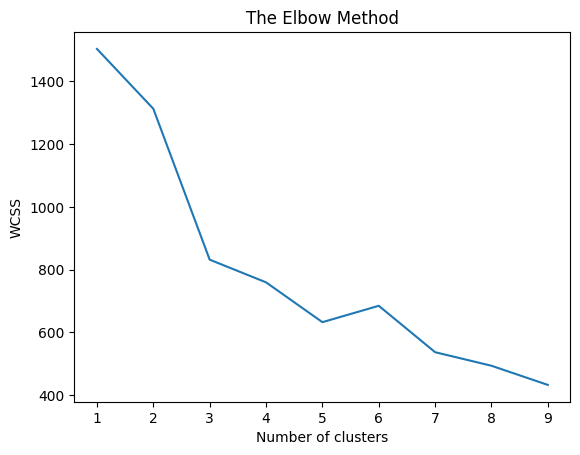

In [7]:
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Instanciando modelo:
kmeans = KMeans(n_clusters = 3, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [10]:
# Inserindo Classes:
df['cluster']=y_kmeans
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2


In [11]:
# Contabilizando Classes:
df['cluster'].value_counts()

,count
cluster,
2,84
1,47
0,36


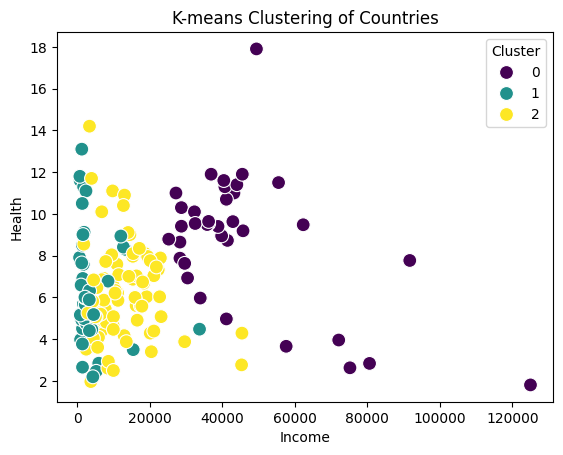

In [12]:
sns.scatterplot(data=df, x='income', y='health', hue='cluster', palette='viridis', s=100)

plt.title('K-means Clustering of Countries')
plt.xlabel('Income')
plt.ylabel('Health')
plt.legend(title='Cluster')
plt.show()

# K-means from Scratch:

## Algoritmo:
1. Retirar escala dos dados;
  * O método escolhido para retirar estala dos dados foi a padronização:
  $z_n = \frac{x-\mu}{\sigma}$
  
2. Inicializar centroids;
3. Etiquetar cada ponto;
4. Atualizar centroids;
5. Repeti-se os passos 3 e 4 os centroids pararem de mudar.

In [13]:
# Função para normalizar os dados
def normalize_data(X):
    '''
    Normaliza os dados para ter média 0 e desvio padrão 1.

    # Entrada:
    numpy.ndarray: Matriz dos dados.

    # Saída:
    numpy.ndarray: Matriz dos dados normalizados.
    '''
    dados_normalizados = []
    for data_point in X.T: # Eu acho mais fácil trabalhar com variáveis como linhas.
        mean = np.mean(data_point)
        std = np.std(data_point)
        data_point_normalizado = [(valor - mean) / std for valor in data_point]
        dados_normalizados.append(data_point_normalizado)

    return np.array(dados_normalizados).T  # Transpondo de volta

In [14]:
def initialize_centroids(X, K):
  '''
    Função criada para normalizar inicializar
  os centroides.

  # Entrada:
  numpy.ndarray: Matriz dos dados.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz dos centróides.

  '''
  # Seleciona K pontos aleatórios do conjunto de dados como centróides iniciais
  indices = np.random.choice(X.shape[0], K, replace=False)
  centroids = X[indices]
  return centroids

In [15]:
def assign_clusters(X, centroids):
  '''
  Atribui cada ponto de dados ao centroide mais próximo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.

  # Saída:
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  '''
  # Atribui cada ponto de dados ao centroide mais próximo
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cluster_assignments = np.argmin(distances, axis=1)
  return cluster_assignments

In [16]:
def update_centroids(X, cluster_assignments, K):
  '''
  Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  '''
  # Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide
  centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
  return centroids

In [17]:
def compute_loss(X, centroids, cluster_assignments):
    '''
    Calcula a distorção (erro de reconstrução) no algoritmo K-means.

    # Entradas:
    numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
    numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
    numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.

    # Saída:
    num: O valor da distorção, que é a soma das distâncias ao quadrado entre cada ponto e seu centroide correspondente.
    '''
    # Calcula a distorção (erro de reconstrução)
    loss = np.sum((X - centroids[cluster_assignments])**2)
    return loss

In [18]:
def k_means(X, K, max_iters=100, tol=1e-4):
  '''
  Implementação do Algoritmo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  int: Número de clusters.
  int: Número máximo de iterações

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.
  '''
  # Inicializa os centróides
  centroids = initialize_centroids(X, K)
  for i in range(max_iters):
      # Atribui os pontos de dados aos centróides mais próximos
      cluster_assignments = assign_clusters(X, centroids)
      # Calcula os novos centróides
      new_centroids = update_centroids(X, cluster_assignments, K)
      # Verifica a convergência (se os centróides mudaram pouco)
      if np.linalg.norm(new_centroids - centroids) < tol:
          break
      centroids = new_centroids
  # Calcula a distorção final
  final_loss = compute_loss(X, centroids, cluster_assignments)
  return centroids, cluster_assignments, final_loss

In [19]:
# Normalizando Dados:
X_norm = normalize_data(X)

# Escolhendo k:
wcss = []
for i in range(1, 10):
    centroids, cluster_assignments, final_loss = k_means(X_norm, i)
    wcss.append(final_loss)

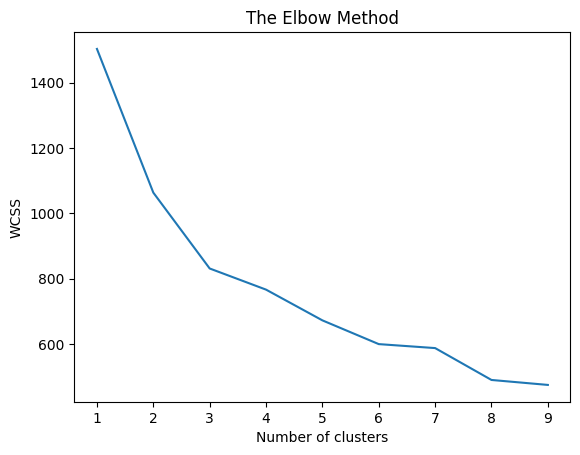

In [20]:
# Plota o gráfico do Método do Cotovelo
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Número de clusters desejado
K = 3

# Executa o algoritmo K-means
centroids, cluster_assignments, final_loss = k_means(X_norm, K)

print("Centroides finais:\n", centroids)
print("Atribuições de clusters:", cluster_assignments)
print("Distorção final:", final_loss)

Centroides finais:
 [[ 0.9453546  -0.39921461 -0.26493145 -0.13456809 -0.67206635  0.31472771
  -0.9750622   0.97121277 -0.60102184]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]
 [-0.64309483  0.12853724  0.18791487 -0.04680774  0.3998113  -0.20717568
   0.6523308  -0.65547792  0.34944888]]
Atribuições de clusters: [0 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 0 2 2 2 0 0 0 0 2 2 0 0 2 2 2 0
 0 0 2 0 2 2 2 2 2 2 0 2 0 0 2 2 2 2 0 0 2 2 0 2 2 0 0 0 0 0 2 2 0 0 2 0 2
 2 2 2 2 2 2 0 0 2 0 0 2 2 0 0 2 2 1 2 0 0 2 2 0 1 0 2 0 2 0 2 2 0 0 0 0 2
 2 0 0 2 2 0 2 2 2 0 2 2 2 2 2 0 0 2 0 2 2 0 1 2 2 0 0 2 2 2 2 0 2 2 2 0 0
 2 0 0 0 2 2 0 0 2 2 2 2 2 0 0 2 2 0 0]
Distorção final: 894.8642153246113


In [22]:
df2 = pd.DataFrame(X, columns=df.columns[:-1])
df2['cluster'] = cluster_assignments
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,2
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,2
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


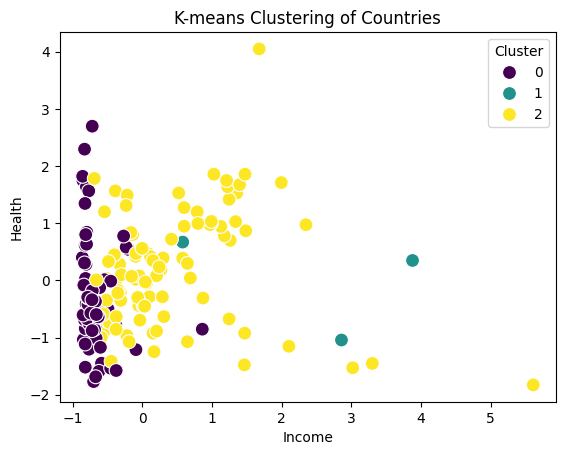

In [23]:
sns.scatterplot(data=df2, x='income', y='health', hue='cluster', palette='viridis', s=100)

plt.title('K-means Clustering of Countries')
plt.xlabel('Income')
plt.ylabel('Health')
plt.legend(title='Cluster')
plt.show()

**Conclusão**

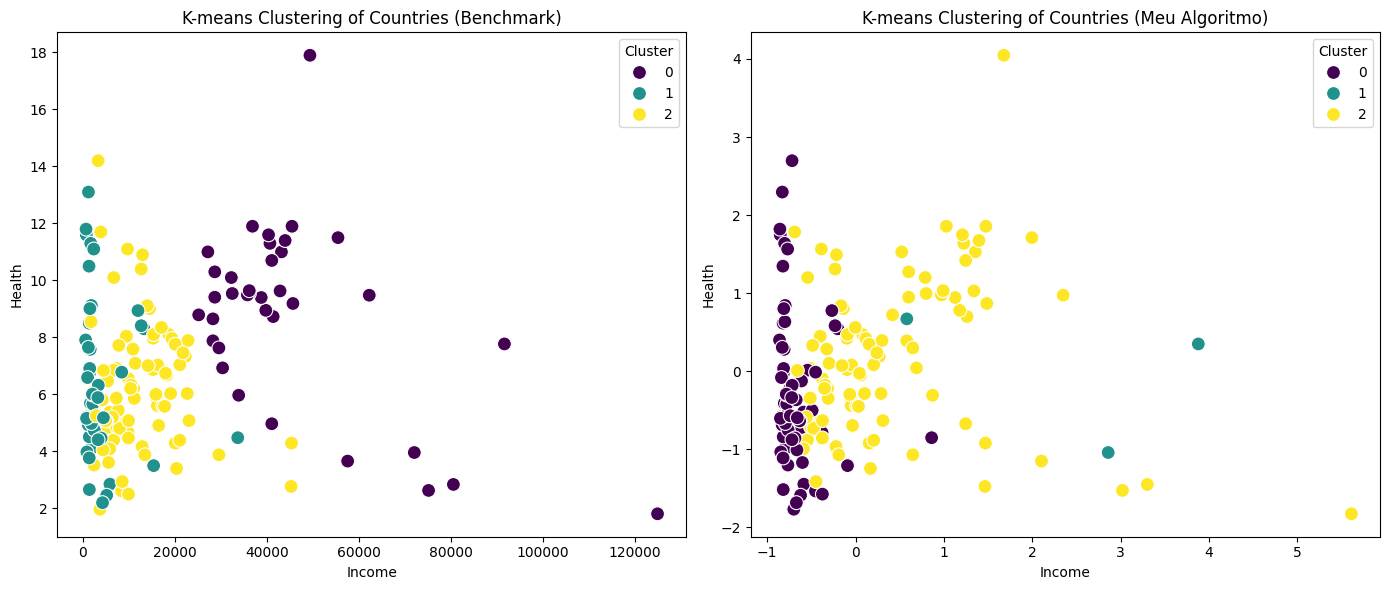

In [24]:
# Configuração dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Primeiro gráfico
sns.scatterplot(data=df, x='income', y='health', hue='cluster', palette='viridis', s=100, ax=axes[0])
axes[0].set_title('K-means Clustering of Countries (Benchmark)')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Health')
axes[0].legend(title='Cluster')

# Segundo gráfico
sns.scatterplot(data=df2, x='income', y='health', hue='cluster', palette='viridis', s=100, ax=axes[1])
axes[1].set_title('K-means Clustering of Countries (Meu Algoritmo)')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Health')
axes[1].legend(title='Cluster')

# Ajustar layout
plt.tight_layout()

# Exibir gráficos
plt.show()